In [84]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd

# all units SI (meters, kg, etc.)
distance = 7
height = 2.495
m = 0.141748
R_l = 0.0508
R_u = 0.03175
R_b = 0.0889
A = 0.0248286665
interval = 0.001
run = True

## Create Functions

In [85]:
def iterate():
    global run
    for w_r in range(30,600): #6380 rpm in rps
        for theta in range(15,85):
            if(run):
                trajectory(w_r, theta*math.pi/180)
    #print("done")
    run = True

In [86]:
def trajectory(w, theta):
    v = (w*R_l + 9/16*w*R_u)/2
    #print(v)
    s = (w*R_l - 9/16*w*R_u)/(2*math.pi*R_b)
    runPath(w,v,s,theta)

In [87]:
def runPath(w,v_i,s,theta_i):
    #print("path")
    
    v_x = v_i*math.cos(theta_i)
    v_y = v_i*math.sin(theta_i)
    theta = theta_i
    x_dist = 0
    y_dist = 0
    through = True
    x = [0]
    y = [0]
    while(through):
        x_dist += v_x*interval
        y_dist += v_y*interval
        x.append(x_dist)
        y.append(y_dist)
        v_n = math.sqrt(v_x*v_x + v_y*v_y)
        theta = angle(v_x,v_y)
#         if(theta > 0):
#             pdb.set_trace()
                  
        magnus = magnusF(s, v_n)
        drag = dragF(v_n)
        #if(magnus*math.sin(theta) < 0):
            #print(magnus*math.sin(theta))
        v_x -= (magnus*math.sin(theta) + drag*math.cos(theta))*interval
        f_y = (drag*math.sin(theta) + 9.8 - magnus*math.cos(theta))
        if(f_y < 0):
            through = False
            break
        #v_y -= (drag*math.sin(theta) + 9.8 - magnus*math.cos(theta))*interval
        v_y -= f_y*interval
        if(v_y < 0.1 and v_y > -0.1):
            if(((x_dist > distance - .01) and (x_dist < distance + .01)) and ((y_dist > height - .015) and (y_dist < height + .015))):
                #print("in")
                through = False
                global w_min
                #print(w*60/(2*math.pi))
                #print(theta_i*180/math.pi)
                plt.plot(x,y)
                omega_array.append(w*60/(2*math.pi))
                theta_array.append(theta_i*180/math.pi)
                print ("w: " + str(w*60/(2*math.pi)) + " a: " + str(theta_i*180/math.pi))
                global run
                run = False
                break
        if(v_y < -0.15):
            through = False
            break

In [88]:
def magnusF(s,v):
    return (0.1)*(16/3)*(math.pi*math.pi)*1.225*(R_b**3)*s*v/m
def dragF(v):
    return (0.47)*(1.225/2)*A*(v**2)/m
def angle(x,y):
    return math.atan(y/x)

1 , 2.3
w: 2263.1832907667517 a: 59.0
2 , 2.77
w: 2349.1269600363753 a: 54.0
3 , 3.2399999999999998
w: 2444.6199258915126 a: 50.0
4 , 3.71
w: 2549.662188332163 a: 46.0
5 , 4.18
w: 2645.1551541873005 a: 43.0
6 , 4.65
w: 2750.1974166279515 a: 40.0
7 , 5.12
w: 2864.7889756541163 a: 37.0
8 , 5.59
w: 2998.479127851308 a: 34.0
9 , 6.0600000000000005
w: 3084.4227971209316 a: 32.0
10 , 6.53


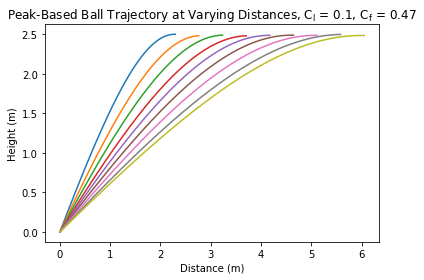

In [97]:
plt.title("Peak-Based Ball Trajectory at Varying Distances, " + '$C_l$ = 0.1, $C_f$ = 0.47')
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")

plt.rcParams.update({'mathtext.default':  'regular' })

trial_array = []
distance_array = []
omega_array = []
theta_array = []
max_trials = 50

for i in range(0,max_trials):
    trial_array.append(i+1)
    distance = 2.3 + ((7-2.3) / max_trials)*i
    distance_array.append(distance)
    print(str(i+1) + " , " + str(distance))
    iterate()

plt.savefig("peak_based_" + str(max_trials) + "_trials.png")
plt.show()

In [90]:
print(len(trial_array))
print(len(distance_array))
print(len(omega_array))
print(len(theta_array))

10
10
9
9


In [93]:
# print(trial_array.pop(9), distance_array.pop(9))
# # trial_array[6]

10 6.53


## Test

In [96]:
def make_bold(val):
    bold = 'bold'
    
    return 'font-weight: %s' % bold

df = pd.DataFrame(data = {'Trial': trial_array, 
                          'Distance': distance_array, 
                          'Angular Velocity': omega_array, 
                          'Angle': theta_array})
print(df)
df.to_csv("peak_based_" + str(max_trials) + "_trials.csv")

   Trial  Distance  Angular Velocity  Angle
0      1      2.30       2263.183291   59.0
1      2      2.77       2349.126960   54.0
2      3      3.24       2444.619926   50.0
3      4      3.71       2549.662188   46.0
4      5      4.18       2645.155154   43.0
5      6      4.65       2750.197417   40.0
6      7      5.12       2864.788976   37.0
7      8      5.59       2998.479128   34.0
8      9      6.06       3084.422797   32.0
